In [ ]:
# Upgrade matplotlib on Colab
# !pip install matplotlib --upgrade

## Métodos de clasificación

### Análisis de discriminantes lineales

- Es un método para clasificar elementos
  - Cada variable aleatorio se asocia con una dimensión geométrica
- Divide el espacio n-dimensional
  - por medio lineas rectas (planos, hiperplanos)
- Los sectores que se obtienen separan las categorías.

(-4.0, 4.0)

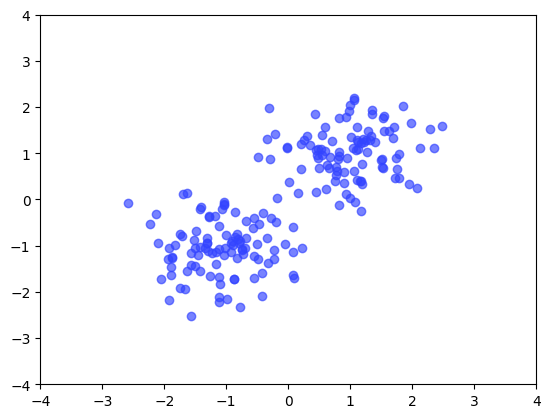

In [42]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

data_a = st.multivariate_normal.rvs([1, 1], [[0.0, 0.3],[0.4, 0.0]], size=100)
data_b = st.multivariate_normal.rvs([-1, -1], [[0.0, 0.3],[0.4, 0.0]], size=100)
# data_c = st.multivariate_normal.rvs([1, -1], [[0.0, 0.1],[0.1, 0.0]], size=100)

joint_data = np.row_stack(
    [
        data_a,
        data_b,
        # data_c
    ]
)

plt.scatter(
    joint_data[:, 0],
    joint_data[:, 1],
    color = "#3344ffaa"
)
plt.xlim(-4, 4)
plt.ylim(-4, 4)


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
fitted = lda.fit(
    joint_data,
    [1]*100 +
    [2]*100
    # + [3] *100
)


Podemos predecir las categorías de nuevos datos.

In [44]:
fitted.predict(joint_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Podemos extraer los datos de las rectas

In [49]:

print(f"Los valores de la/s ordenadas al origen es/son: {fitted.intercept_}")
print(f"Los valores de los coeficientes son: {fitted.coef_}")


Los valores de la/s ordenadas al origen es/son: [-0.34917901]
Los valores de los coeficientes son: [[-5.32305313 -6.22146762]]


También podemos extraer loo puntos medio de cada categoría

In [46]:
print(f"Las medias de las categorías son:\n{fitted.means_}")


Las medias de las categorías son:
[[ 0.98293426  1.02817352]
 [-1.08186857 -1.05577561]]


Las rectas que describen los planos se definen como:
- $0 = a + b_1 \times X_1 + b_2\times X_2 \ldots $

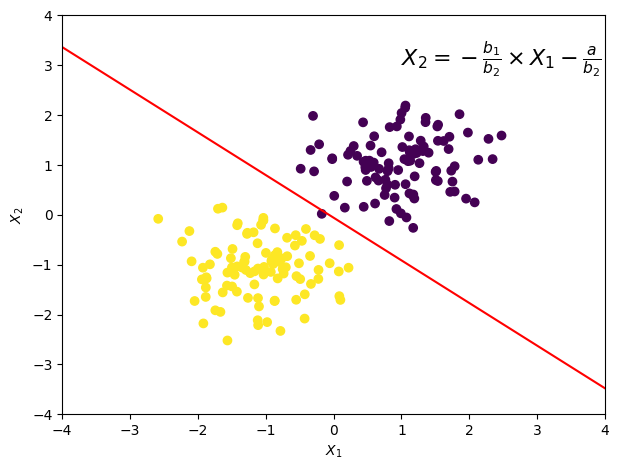

In [47]:
m = fitted.coef_[0, 0] / fitted.coef_[0, 1]
m1 = fitted.intercept_ / fitted.coef_[0, 1]
# m1 = fitted.intercept_[2] / fitted.coef_[2, 1]

line_div = lambda x: - m * x - m1
plt.scatter(
    joint_data[:, 0],
    joint_data[:, 1],
    c = [0] * 100 + [1] * 100 # [2] * 100
)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

xs = np.linspace(-4, 4, 100)
plt.plot(
    xs,
    line_div(xs),
    color = "red"
)
plt.text(
    1, 3,
    s = "$X_2 = -\\frac{b_1}{b_2}\\times X_1 - \\frac{a}{b_2}$",
    fontsize = 16
)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.tight_layout()

Ejemplo con el dataset Iris

In [50]:
import sklearn.datasets as datasets

iris = datasets.load_iris(as_frame = True)
df = iris["frame"]

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)
lda = LinearDiscriminantAnalysis()
fitted = lda.fit(train.drop(columns=["target"]), train["target"])
predicted_classes = fitted.predict(test.drop(columns=["target"]))

In [54]:
prediction_table = (predicted_classes == test["target"]).value_counts()
accuracy = prediction_table[True] / (prediction_table.sum())
print(f"Accuracy: {accuracy*100:0.2f}%")

Accuracy: 94.74%


### Análisis de discriminantes cuadráticos

(-4.0, 4.0)

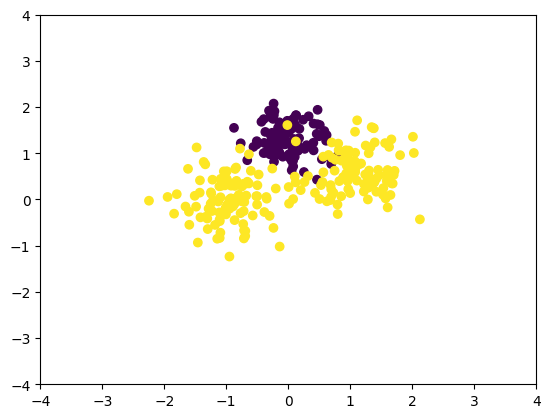

In [81]:

import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

data_a = st.multivariate_normal.rvs([0, 1.3], [[0.0, 0.1],[0.1, 0.0]], size=100)
data_b = st.multivariate_normal.rvs([-1, 0], [[0.0, 0.2],[0.2, 0.0]], size=100)
data_c = st.multivariate_normal.rvs([1, 0.6], [[0.0, 0.2],[0.2, 0.0]], size=100)

joint_data = np.row_stack(
    [
        data_a,
        data_b,
        data_c
    ]
)

plt.scatter(
    joint_data[:, 0],
    joint_data[:, 1],
    c = [0] * 100 + [1] * 200
)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

In [82]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

joint_data = np.column_stack([joint_data, [0]*100 + [1]*200])

train, test = train_test_split(joint_data)

qda = QuadraticDiscriminantAnalysis()

fitted = qda.fit(joint_data[:, [0, 1]], joint_data[:, 2])

predicted = fitted.predict(test[:, [0, 1]])

In [83]:
import pandas as pd
prediction_table = pd.Series(predicted == test[:,2]).value_counts()

print(prediction_table)

accuracy = prediction_table[True] / prediction_table.sum()
print(f"accuracy = {accuracy}")

True     72
False     3
dtype: int64
accuracy = 0.96


Podemos visualizar el área de decisión

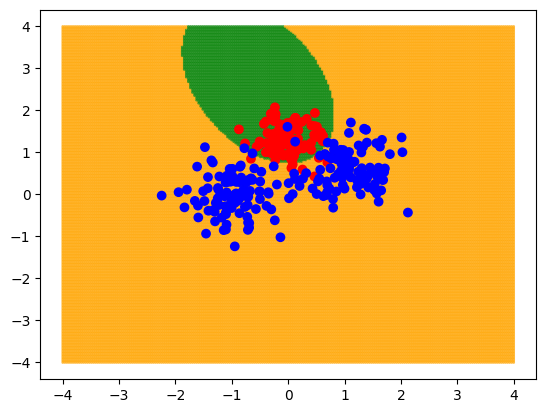

In [84]:
xy = np.meshgrid(
    np.linspace(-4, 4, 220),
    np.linspace(-4, 4, 220)
)
xy = np.array([xy[0].ravel(), xy[1].ravel()])

colors = np.array(["green", "orange"])

plt.scatter(
    xy.T[:,0],
    xy.T[:,1],
    c = colors[(fitted.decision_function(xy.T)>0).astype(int)],
    alpha = 0.7,
    s = 4,
    linewidths=0
)

plt.scatter(
    joint_data[:, 0],
    joint_data[:, 1],
    c = ['red'] * 100 + ['blue'] * 200
)


¿Y si tengo varaibles categóricas?

In [89]:
import pandas as pd

data = [
    [0, "A1", "B1", "C1"],
    [0, "A1", "B1", "C1"],
    [0, "A1", "B1", "C2"],
    [0, "A1", "B1", "C2"],
    [0, "A1", "B1", "C1"],
    [0, "A2", "B1", "C2"],
    [1, "A1", "B2", "C1"],
    [1, "A1", "B2", "C2"],
    [1, "A1", "B1", "C1"],
    [1, "A2", "B1", "C2"],
    [1, "A2", "B1", "C1"],
    [1, "A2", "B1", "C2"],
    [1, "A2", "B2", "C1"],
    [1, "A2", "B2", "C2"],
]

df = pd.DataFrame(
    data = data,
    columns = ["Group", "VarA", "VarB", "VarC"]
)

df = pd.get_dummies(df)
display(df)

,Group,VarA_A1,VarA_A2,VarB_B1,VarB_B2,VarC_C1,VarC_C2
0,0,1,0,1,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,0,1
3,0,1,0,1,0,0,1
4,0,1,0,1,0,1,0
5,0,0,1,1,0,0,1
6,1,1,0,0,1,1,0
7,1,1,0,0,1,0,1
8,1,1,0,1,0,1,0
9,1,0,1,1,0,0,1


In [97]:
lda = LinearDiscriminantAnalysis()

lda.fit(df.iloc[:, 1:], df["Group"])

predicted = lda.predict(df.iloc[:, 1:])

accuracy = (predicted == df["Group"]).sum() / len(df)

print(f"Accuracy: {accuracy*100:0.2f}%")

Accuracy: 85.71%
